In [39]:
import matplotlib
#Importing pyplot
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [41]:
# get function for number of movies for each available year in .csv
df = pd.read_csv(r'C:\Users\lauw02\Desktop\stats 418\Stats-418-W20\hw2\q2\movies.csv')
table_per_year = df['year'].value_counts()
df2 = table_per_year.rename_axis('unique_years').reset_index(name='movie_counts')
#table_per_year.iloc[:,1]
#df2

In [42]:
#np.arange(1920, 2020, 10)
#plot the average ratings of movies in each year as a scatter plot on top of that

#find the average ratings of movies each year
#plot the average ratings of movies in each year as a scatter plot on top of that. For each point in the scatter plot, add error bars corresponding to 95% intervals.
agg = df.groupby('year').agg({'title':'count', 'rating':'mean'}).reset_index()
agg.loc[:,'se'] = agg['title'] / np.sqrt(agg['title'])
agg.loc[:,'lwr'] = agg['rating'] - 1.96*agg['se']
agg.loc[:,'upr'] = agg['rating'] + 1.96*agg['se']
#agg

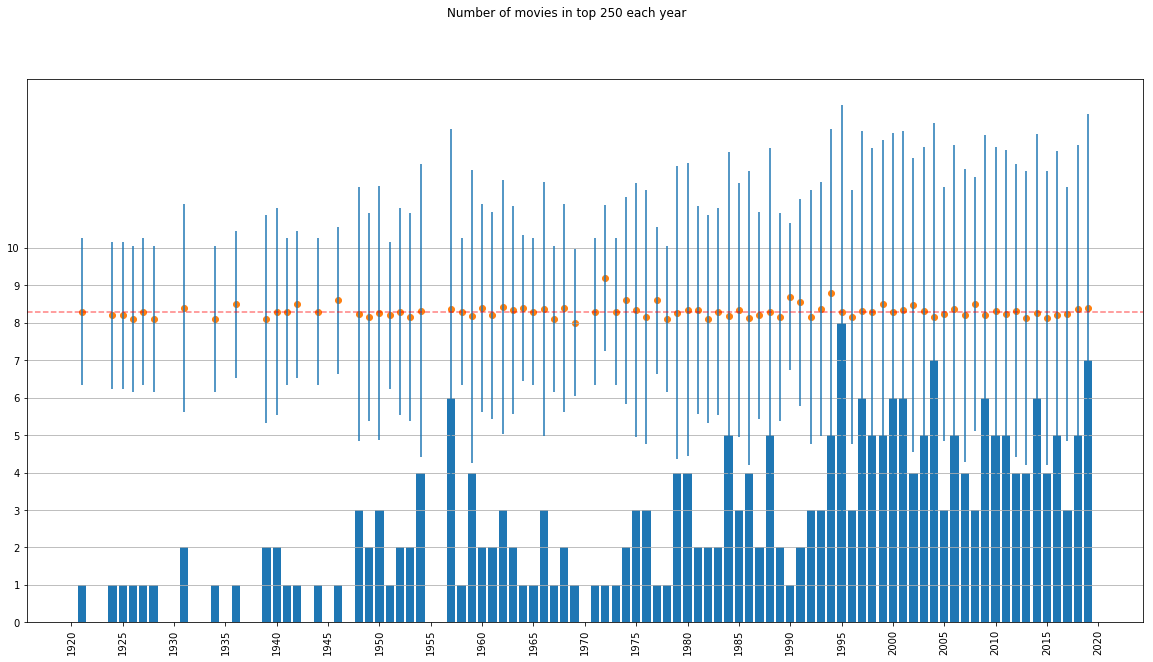

In [45]:
xtickmarks = np.arange(1920, 2021, 5)
ytickmarks = np.arange(0,10+1, step=1)

fig, ax = plt.subplots(figsize=(20,10)) # just adjust the overall length and heigh of the graph
ax.bar(x=agg['year'], height=agg['title']) #plot the count of movie titles in earch year
ax.scatter(x=agg['year'], y=agg['rating']) #plot scatterplot for average ratings of all movies that year 
ax.errorbar(x=agg['year'], y=agg['rating'], yerr=[ 1.96*agg['se'], 1.96*agg['se']], linestyle='') #along with upper and lower 95% CI's
##try to get the tickmarks to show up on bargraph?
plt.setp(ax, xticks=xtickmarks,
        yticks=ytickmarks)
plt.xticks(rotation =90)
plt.axhline(df['rating'].mean(), color='red', linestyle='--', alpha=0.5) #dashed line for grand mean of all movies
plt.grid(True, which='both', axis = 'y')
plt.savefig("chart.png", dpi=150)
plt.suptitle('Number of movies in top 250 each year')
plt.show()